In [1]:
# CSMODEL - S12
# Group members:
# Dela Cruz, Frances
# Gamboa, Mikkel
# Verano, Carl
# Yu, Hanz

# CSMODEL Project Phase 1

## Dataset Description

### Title: COVID-19 and its Impact on Students

Link: https://www.kaggle.com/datasets/kunal28chaturvedi/covid19-and-its-impact-on-students/data

### Description:

The dataset contains data that identifies Covid-19's impact on students' education, social life and mental health of students

### Data collection method and implications:

With a sample size of 1182 students, the data collection method was an online cross-sectional survey conducted across different institutions in Delhi Capital Region (NCR). Being a web survey, the data has the limitation and sampling bias of having selection bias and non-response bias. Only those who choose to answer are included in the data; consequently, the study is unable to get data from those that opt to not answer.

### Dataset Structure

Each row in the dataset is a response from an individual, and each corresponding column represent the survey questions that they are answering. The dataset contains a total of 1182 observations, and there are 19 variables in total.

### Variables

- **ID**
     - Unique identification of each student participating in the survey
- **Region of Residence**
     - Region where each student participating in the survey is residing
- **Age of Subject**
     - Age of each student participating in the survey
- **Time spent on Online Class**
     - Average time spent for online study in hours per day
- **Rating of Online Class experience**
     - An assessment of the experience of online learning to evaluate the levels of satisfaction among students
- **Medium for Online Class**
     - Method of conducting online class
- **Time spent on self study**
     - Average time spent for self-study in hours per day
- **Time spent of fitness**
     - Average time spent on exercising in hours per day
- **Time spent on sleep**
     - Average time spent on sleeping in hours per day
- **Time spent on social media**
     - Average time spent on social media in hours per day
- **Preferred social media platform**
     - Preferred social media platform that student participants use as a stress reliever
- **Time spent on TV**
     - Average time spent on TV in hours per day
- **Number of meals per day**
     - Meals eaten by respondents per day
- **Change in your weight**
     - Change in body weight within the specified period
- **Health issue during lockdown**
     - An assessment of health on the student participants due to the change in lifestyle
- **Stress busters**
     - Different medium of stress busters
- **Time utilized**
     - Satisfaction regarding the respondent’s utilization of their time during the pandemic
- **Do you find yourself more connected with your family, close friends, relatives?**
     - Determining the cohesion between family members, close friends, and relatives
- **What you miss the most**
     - Interests that respondents miss due to being in lockdown

# Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, norm

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Data Cleaning

In [3]:
responses_df = pd.read_csv("COVID-19 Survey Student Responses.csv")

In [4]:
#Checking for unique values to see if there are any duplicates just in case
responses_df['Age of Subject'].unique()

array([21, 20, 19, 22, 31, 23, 17, 24, 18, 25, 16, 10, 14, 15, 34, 26, 59,
       32, 30, 13, 29, 12, 43, 11, 40, 42, 28, 27,  9, 36,  8, 50, 35, 45,
        7, 44, 46, 52, 38, 37, 33, 39], dtype=int64)

In [5]:
#Checking for datatypes to determine IF the decimals for example in "Time spent on Online Class" is actually correct.
responses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 19 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   ID                                                                                  1182 non-null   object 
 1   Region of residence                                                                 1182 non-null   object 
 2   Age of Subject                                                                      1182 non-null   int64  
 3   Time spent on Online Class                                                          1182 non-null   float64
 4   Rating of Online Class experience                                                   1158 non-null   object 
 5   Medium for online class                                                             1131 non-null

In [6]:
#Checking for the unique values to see if there are any errors
responses_df['Time spent on Online Class'].unique()

array([ 2.  ,  0.  ,  7.  ,  3.  ,  1.  ,  5.  ,  4.  ,  8.  ,  6.  ,
        1.5 ,  2.5 ,  0.1 ,  0.5 ,  9.  ,  5.5 ,  0.75,  0.7 ,  3.5 ,
        0.8 , 10.  ,  7.5 ])

In [7]:
#Checking for the unique values to see if there are any errors
responses_df['Rating of Online Class experience'].unique()

array(['Good', 'Excellent', 'Very poor', 'Average', nan, 'Poor'],
      dtype=object)

In [8]:
#Checking for the unique values to see if there are any errors
responses_df['Medium for online class'].unique()

array(['Laptop/Desktop', 'Smartphone', 'Tablet', nan, 'Any Gadget',
       'Smartphone or Laptop/Desktop'], dtype=object)

In [9]:
#Checking for the unique values to see if there are any errors
responses_df['Time spent on self study'].unique()

array([ 4. ,  0. ,  3. ,  2. ,  6. ,  1. ,  5. , 18. ,  8. , 17. ,  0.5,
        7. ,  1.5,  2.5, 10. , 12. ,  9. ,  2.3,  1.2,  3.5,  6.5, 11. ,
        4.5])

In [10]:
#Checking for the unique values to see if there are any errors
responses_df['Time spent on fitness'].unique()

array([0.  , 2.  , 1.  , 0.5 , 3.  , 0.25, 5.  , 2.5 , 0.3 , 4.  , 0.6 ])

In [11]:
#Checking for the unique values to see if there are any errors
responses_df['Time spent on sleep'].unique()

array([ 7. , 10. ,  6. ,  8. ,  5. ,  9. ,  4. , 12. , 11. ,  6.5,  7.5,
       14. , 13. , 15. ,  7.8,  6.7,  8.5,  8.3])

In [12]:
#Checking for the unique values to see if there are any errors
responses_df['Number of meals per day'].unique()

array([4, 3, 1, 2, 6, 5, 7, 8], dtype=int64)

In [13]:
#Checking for the unique values to see if there are any errors
responses_df['Change in your weight'].unique()

array(['Increased', 'Decreased', 'Remain Constant'], dtype=object)

In [14]:
#Checking for the unique values to see if there are any errors
responses_df['Health issue during lockdown'].unique()

array(['NO', 'YES'], dtype=object)

Datatypes are clean, and all the variables above that will be taken into consideration by the study was already clean.

In [15]:
#Checking for the variables with NaN (some missing data, but it doesn't mean incomplete/incorrect, could be optional)
responses_df.isnull().any()

ID                                                                                    False
Region of residence                                                                   False
Age of Subject                                                                        False
Time spent on Online Class                                                            False
Rating of Online Class experience                                                      True
Medium for online class                                                                True
Time spent on self study                                                              False
Time spent on fitness                                                                 False
Time spent on sleep                                                                   False
Time spent on social media                                                            False
Prefered social media platform                                                  

In [16]:
#Checking for the count of the variables with NaN
nan_variables = responses_df.columns[responses_df.isnull().any()].tolist()
print(nan_variables)
responses_df[nan_variables].isnull().sum()

['Rating of Online Class experience', 'Medium for online class', 'Prefered social media platform']


Rating of Online Class experience    24
Medium for online class              51
Prefered social media platform       17
dtype: int64

With reference to the line below, replacing the "Rating of Online Class experience" value with nan when their 
corresponding answer to the "Medium for online class" is also nan since in the
context of the dataset, it wouldn't make sense to have values for the
"Rating of Online Class experience" when they don't have a medium for it.

In [17]:
responses_df.loc[responses_df['Medium for online class'].isna(), 'Rating of Online Class experience'] = None

In [18]:
#Double check to see if original dataFrame was updated and correctly equated all "Rating of Online Class experience"
#observations with nan values that have nan values for "Medium for online class"
responses_df[nan_variables].isnull().sum()

Rating of Online Class experience    51
Medium for online class              51
Prefered social media platform       17
dtype: int64

We will drop all the NaN values for Rating of Online Class experience variable/column since there are only 51, it wouldn't affect the overall DataFrame.

In [19]:
exclude_variables = ['Medium for online class', 'Prefered social media platform']
dropped_variables = list(set(nan_variables) - set(exclude_variables))
responses_df = responses_df.dropna(subset=dropped_variables)

Code below is to double check if the Rating of Online Class experience doesn't have NaN values|

In [20]:
responses_df[nan_variables].isnull().any()

Rating of Online Class experience    False
Medium for online class              False
Prefered social media platform        True
dtype: bool

In [21]:
responses_df.shape

(1131, 19)

**All the data that will be needed by the project has been cleaned.**

# Exploratory Data Analysis

1. What is the mode for Rating of Online Class experience?
2. What is the average time spent taking online classes?
3. What is the average time spent on self-studying?
4. Is there a correlation between 'Time spent on online class' and ‘Time spent on sleep’?
5. Is there a correlation between “Time spent on Online Class” with “Rating of Online Class experience”?
6. Is there a correlation between “Time spent on Online Class” with “Number of meals per day”?
7. Do students who report to spend more time on fitness spend less time on self-studying?
8. Is there a correlation between “Age of Subject” and “Number of meals per day”?
9. Is there a correlation between “Age of Subject” and “Time spent on sleep”?

## Numerical Summaries and Visualization

### 1. What is the mode for Rating of Online Class experience?

Mode:

In [22]:
responses_df.agg({"Rating of Online Class experience": ["mode"]})

,Rating of Online Class experience
,mode
0,Very poor


Bar plot:

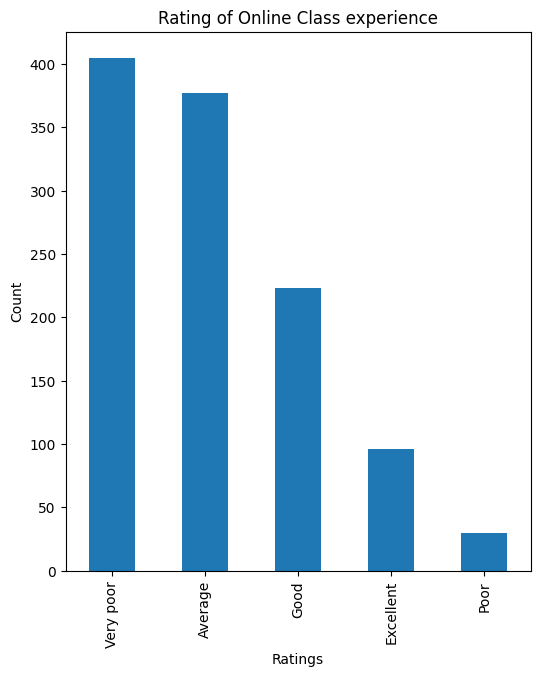

In [23]:
rating_count_df = responses_df['Rating of Online Class experience'].value_counts()
rating_count_df.plot.bar(figsize=(6,7)).axis()
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.title('Rating of Online Class experience')
plt.show()

With reference to the calculations and the bar plot, the most common rating experience for online class is "Very poor". It is the most commonly voted experience but from the distribution, "Very poor" and "Average" are close in number.

### 2. What is the average time spent taking online classes?

In [24]:
responses_df.agg({"Time spent on Online Class": ["mean", "median"]})

,Time spent on Online Class
mean,3.298895
median,3.000000


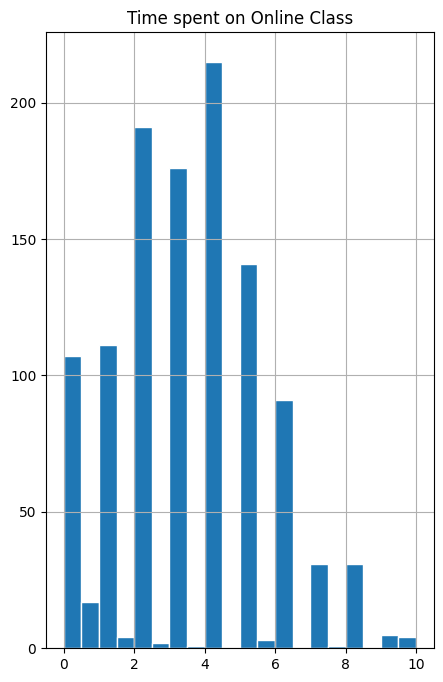

In [25]:
responses_df.hist("Time spent on Online Class", bins=20, edgecolor='w', figsize=(5, 8))
plt.show()

From the numerical summaries and histogram, it can be inferred that the better central tendency (or average) is the median despite the mean being higher since the distribution of time spent on online class is skewed and has a lot of highs and lows in the distribution of the data which lead to the greater in value for the mean over the median.

### 3. What is the average time spent on self-studying?

In [26]:
responses_df.agg({"Time spent on self study": ["mean", "median"]})

,Time spent on self study
mean,2.91954
median,2.00000


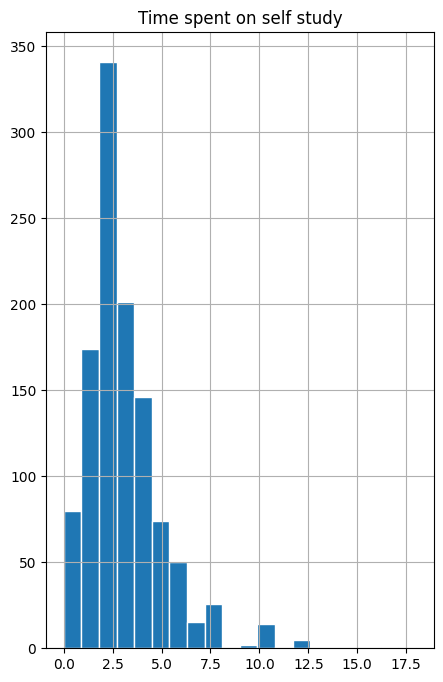

In [27]:
responses_df.hist("Time spent on self study", bins=20, edgecolor='w', figsize=(5, 8))
plt.show()

From the numerical summaries and histogram, it can be inferred that the better central tendency (or average) is the median despite the mean being higher since the distribution of time spent on self study is right skewed. With reference to the histogram, the mean is higher than the median which just proves that the outliers (the ones with high values) affected the mean greatly.

### 4. Is there a correlation between 'Time spent on Online Class' and ‘Time spent on sleep’?

In [28]:
online_sleep = responses_df[["Time spent on Online Class", "Time spent on sleep"]]
online_sleep

,Time spent on Online Class,Time spent on sleep
0,2.0,7.0
1,0.0,10.0
2,7.0,6.0
3,3.0,6.0
4,3.0,8.0
...,...,...
1177,3.0,8.0
1178,6.0,9.0
1179,4.0,8.0
1180,5.0,8.0


In [29]:
online_sleep.corr()

,Time spent on Online Class,Time spent on sleep
Time spent on Online Class,1.000000,-0.181763
Time spent on sleep,-0.181763,1.000000


Text(0.5, 1.0, 'Relationship of Time spent on Online Class & Time spent on sleep')

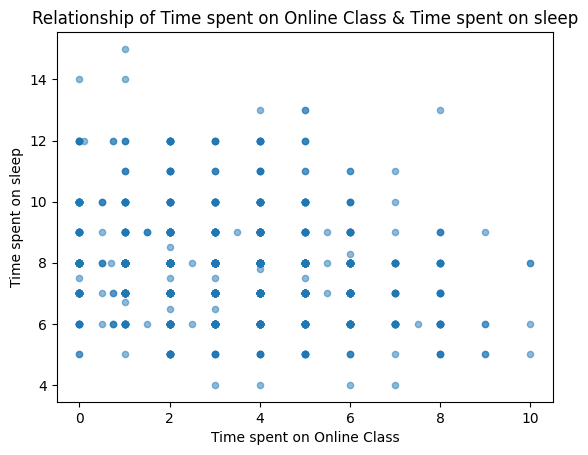

In [30]:
online_sleep.plot.scatter(x='Time spent on Online Class', y='Time spent on sleep', alpha=0.5)
plt.title('Relationship of Time spent on Online Class & Time spent on sleep')

The correlation between "Time spent on Online Class" & "Time spent on sleep" is -0.177782. Thus there's no correlation between the two.

### 5. Is there a correlation between “Time spent on Online Class” with “Rating of Online Class experience”.

Correlation coefficient: 0.15501886151920818


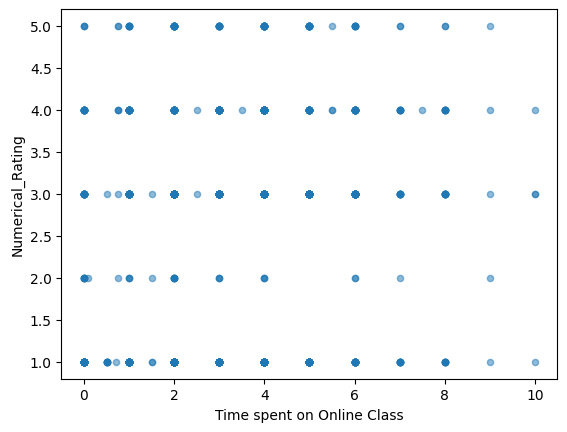

In [31]:
class_exp = responses_df[["Time spent on Online Class", "Rating of Online Class experience"]].copy()
rating_mapping = {
    'Very poor': 1,
    'Poor': 2,
    'Average': 3,
    'Good': 4,
    'Excellent': 5
}
class_exp['Numerical_Rating'] = class_exp['Rating of Online Class experience'].map(rating_mapping)

correlation_class_exp = class_exp['Time spent on Online Class'].corr(class_exp['Numerical_Rating'], method='spearman')
print("Correlation coefficient:", correlation_class_exp)

ax = class_exp.plot.scatter(x='Time spent on Online Class', y='Numerical_Rating', alpha=0.5)

plt.show()

The correlation between "Time spent on Online Class" & "Rating of Online Class experience" is 0.15501886151920818. Thus there's no correlation between the two.

### 6. Is there a correlation between “Time spent on Online Class” with “Number of meals per day”.

In [32]:
online_meals = responses_df[["Time spent on Online Class", "Number of meals per day"]]
online_meals

,Time spent on Online Class,Number of meals per day
0,2.0,4
1,0.0,3
2,7.0,3
3,3.0,3
4,3.0,4
...,...,...
1177,3.0,3
1178,6.0,4
1179,4.0,4
1180,5.0,4


In [33]:
online_meals.corr()

,Time spent on Online Class,Number of meals per day
Time spent on Online Class,1.000000,-0.007205
Number of meals per day,-0.007205,1.000000


Text(0.5, 1.0, 'Relationship of Time spent on Online Class & Number of meals per day')

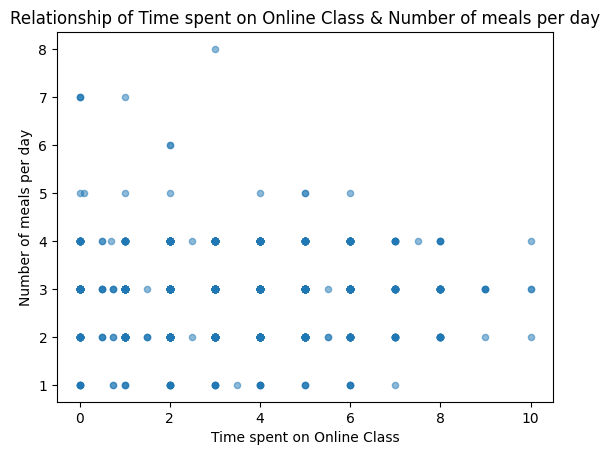

In [34]:
online_meals.plot.scatter(x='Time spent on Online Class', y='Number of meals per day', alpha=0.5)
plt.title('Relationship of Time spent on Online Class & Number of meals per day')

The correlation between "Time spent on Online Class" & "Number of meals per day" is 0.003237. Thus there's no correlation between the two.

### 7. Do students who report to spend more time on fitness spend less time on self-studying?

In [35]:
fit_study = responses_df[["Time spent on fitness", "Time spent on self study"]]
fit_study

,Time spent on fitness,Time spent on self study
0,0.0,4.0
1,2.0,0.0
2,0.0,3.0
3,1.0,2.0
4,1.0,3.0
...,...,...
1177,1.0,4.0
1178,1.0,4.0
1179,0.5,0.0
1180,1.0,3.5


In [36]:
fit_study.corr()

,Time spent on fitness,Time spent on self study
Time spent on fitness,1.00000,0.02142
Time spent on self study,0.02142,1.00000


Text(0.5, 1.0, 'Relationship of Time spent on fitness & Time spent on self study')

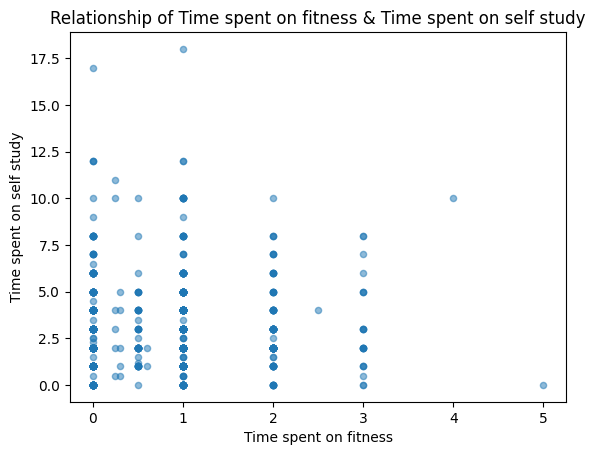

In [37]:
fit_study.plot.scatter(x='Time spent on fitness', y='Time spent on self study', alpha=0.5)
plt.title('Relationship of Time spent on fitness & Time spent on self study')

The correlation between "Time spent on fitness" & "Time spent on self study" is 0.022088. Thus there's no correlation between the two. Since there's no correlation, it means that the answer to the EDA question does not suggest that spending more time on fitness spend less time on self-studying.

### 8. Is there a correlation between “Age of Subject” and “Number of meals per day”.

In [38]:
age_meals = responses_df[["Age of Subject", "Number of meals per day"]]
age_meals

,Age of Subject,Number of meals per day
0,21,4
1,21,3
2,20,3
3,20,3
4,21,4
...,...,...
1177,12,3
1178,14,4
1179,13,4
1180,14,4


In [39]:
age_meals.corr()

,Age of Subject,Number of meals per day
Age of Subject,1.000000,-0.033955
Number of meals per day,-0.033955,1.000000


Text(0.5, 1.0, 'Relationship of Age of Subject & Number of meals per day')

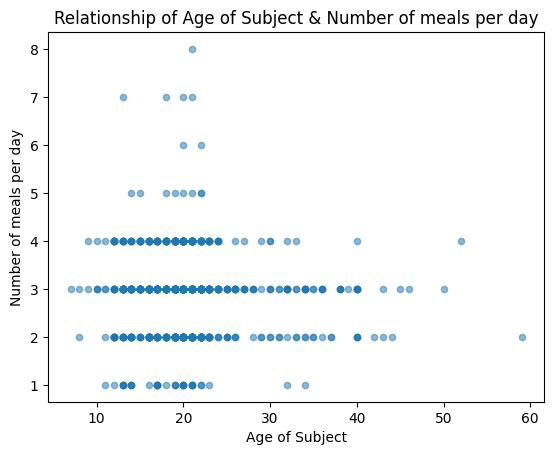

In [40]:
age_meals.plot.scatter(x='Age of Subject', y='Number of meals per day', alpha=0.5)
plt.title('Relationship of Age of Subject & Number of meals per day')

The correlation between "Age of Subject" & "Number of meals per day" is -0.03425. Thus there's no correlation between the two.

### 9. Is there a correlation between “Age of Subject” and “Time spent on sleep”.

In [41]:
age_sleep = responses_df[["Age of Subject", "Time spent on sleep"]]
age_sleep

,Age of Subject,Time spent on sleep
0,21,7.0
1,21,10.0
2,20,6.0
3,20,6.0
4,21,8.0
...,...,...
1177,12,8.0
1178,14,9.0
1179,13,8.0
1180,14,8.0


In [42]:
age_sleep.corr()

,Age of Subject,Time spent on sleep
Age of Subject,1.000000,-0.116642
Time spent on sleep,-0.116642,1.000000


Text(0.5, 1.0, 'Relationship of Age of Subject & Time spent on sleep')

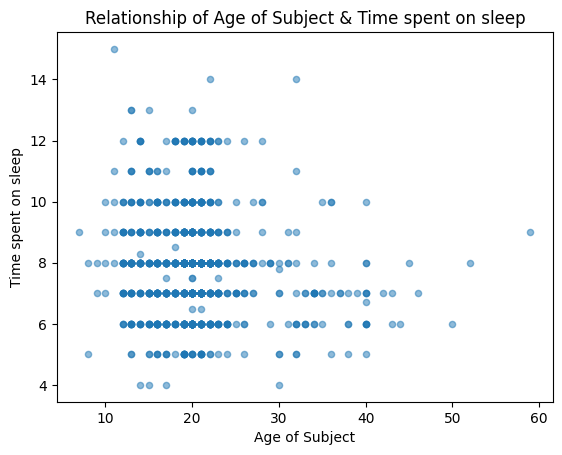

In [43]:
age_sleep.plot.scatter(x='Age of Subject', y='Time spent on sleep', alpha=0.5)
plt.title('Relationship of Age of Subject & Time spent on sleep')

The correlation between "Age of Subject" & "Time spent on sleep" is -0.11671. Thus there's no correlation between the two.

# Research Question

How has the experience of online learning during the COVID-19 lockdown correlated with their physical health among students?

COVID-19 forced a sudden and widespread shift to online learning, thus affecting millions of students worldwide. It is important to answer this question to learn help understand the direct/indirect impacts of prolonged screen time and physical inactivity due to online learning on the physical health among students; or how mental mealth could also affect it. Recognizing these correlations is crucial for developing strategies to mitigate adverse health outcomes. Though some may not show instant correlation, that may just be a long-term implication and thus should be looked into. The study could also affect how educational policies in the future will be implemented if ever a similar situation occurs. Answering the question may contribute to other educational institutes that may want to implement better policies for the students going forward as well.

# CSMODEL PHASE 2

### Time Spent on Online Classes

The binning for the Time Spent on Online Classes was based on getting the median, the maximum value, the minimum value, the 1st quartile and the 3rd quartile of the values. This was then used to determine which ranges to use.

In [44]:
def mapping(online):
    if online <= 2:
        return "0-2"
    if online <= 3:
        return "2-3"
    if online <= 5:
        return "3-5"
    return "5++"

responses_df["Time spent on Online Class"] = responses_df["Time spent on Online Class"].map(mapping)

### Time spent on self study

The binning for the Time spent on self study was based on getting the median, the maximum value, the minimum value, the 1st quartile and the 3rd quartile of the values. This was then used to determine which ranges to use.

In [45]:
def mapping(self):
    if self <= 2:
        return "0-2"
    if self <= 4:
        return "2-4"
    return "4++"

responses_df["Time spent on self study"] = responses_df["Time spent on self study"].map(mapping)
responses_df["Time spent on self study"]

0       2-4
1       0-2
2       2-4
3       0-2
4       2-4
       ... 
1177    2-4
1178    2-4
1179    0-2
1180    2-4
1181    0-2
Name: Time spent on self study, Length: 1131, dtype: object

### Time Spent on Sleep

The binning for the Time Spent on Sleep was based on this source: https://www.cdc.gov/sleep/features/getting-enough-sleep.html

The time spent on sleep is dependent on the age of the participant; hence, two variables were used for this.

In [46]:
# Time Spent on Sleep
def mapping(age, time_sleep):
    # 6-12 years
    if age >= 6 and age <= 12:
        if time_sleep >=9 and time_sleep <= 12:
            return "Recommended Sleep"
        if time_sleep < 9:
            return "Below Recommended Sleep"
        if time_sleep > 12:
            return "Above Recommended Sleep"
    
    #13-18 years
    if age >= 13 and age <= 18:
        if time_sleep >=8 and time_sleep <= 10:
            return "Recommended Sleep"
        if time_sleep < 8:
            return "Below Recommended Sleep"
        if time_sleep > 10:
            return "Above Recommended Sleep"
    
    #above 18
    if age >= 18:
        if time_sleep >= 7:
            return "Recommended Sleep"
        if time_sleep < 7:
            return "Below Recommended Sleep"

responses_df["Time spent on sleep"] = responses_df.apply(lambda row: mapping(row["Age of Subject"], row["Time spent on sleep"]), axis = 1)

responses_df["Time spent on sleep"]

0             Recommended Sleep
1             Recommended Sleep
2       Below Recommended Sleep
3       Below Recommended Sleep
4             Recommended Sleep
                 ...           
1177    Below Recommended Sleep
1178          Recommended Sleep
1179          Recommended Sleep
1180          Recommended Sleep
1181    Below Recommended Sleep
Name: Time spent on sleep, Length: 1131, dtype: object

### Number of meals per day

The binning for the Number of meals per day was based on this source: https://ijbnpa.biomedcentral.com/articles/10.1186/s12966-023-01532-z

It categorizes the number of meals between low frequency and high frequency

In [47]:
def mapping(rating):
    if rating <= 3:
        return "Low frequency"
    if rating >= 4:
        return "High frequency"

responses_df["Number of meals per day"] = responses_df["Number of meals per day"].map(mapping)

### Time Spent on Fitness

The binning for the Time Spent on Fitness was based on this source: https://www.who.int/news-room/fact-sheets/detail/physical-activity#:~:text=should%20do%20at%20least%20an,physical%20activity%2C%20across%20the%20week

The time spent on fitness is dependent on the age of the participant; hence, two variables were used for this.

In [48]:
def mapping(Age, Fitness):
    if Age < 18 and Fitness <= 1:
        return "Below Recommended Exercise"
    if Age < 18 and Fitness > 1:
        return "Above Recommended Exercise"
    
    if Age >= 18 and Fitness < 2.5:
        return "Below Recommended Exercise"
    if Age >= 18 and Fitness >= 2.5:
        return "Above Recommended Exercise"

responses_df["Time spent on fitness"] = responses_df.apply(lambda row: mapping(row["Age of Subject"], row["Time spent on fitness"]), axis = 1)

### Age of subject

The binning for the age was based on this source: https://www.indexmundi.com/india/age_structure.html#:~:text=Information%20is%20included%20by%20sex,years%20and%20over%20(elderly)

Since the dataset was acquired from India, this website that provided India's age structure was used to categorize the respondent's age

In [49]:
# Age of Subject
def mapping(age_range):
    if age_range <= 14:
        return "children"
    if age_range <= 24:
        return "early working age"
    if age_range <= 54:
        return "prime working age"
    if age_range <= 64:
        return "mature working age"
    return "elderly"

responses_df["Age of Subject"] = responses_df["Age of Subject"].map(mapping)

In [50]:
columns = ['Age of Subject', 'Time spent on Online Class', 'Rating of Online Class experience', 'Time spent on self study', 'Time spent on fitness', 'Time spent on sleep', 'Number of meals per day', 'Change in your weight', 'Health issue during lockdown']
phase2_df = responses_df[columns].copy()

## One Hot Encoding

All of the involved variables were processed through one hot encoding to easily see the overview of which specific responses per variable each observations had. This process was also done in preparation for easier formulation of the baskets by having booleans for the data of the observations.

In [51]:
# Age of Subject
df_encoded_ageOfSubject = pd.get_dummies(phase2_df, columns=['Age of Subject'], prefix='Age of Subject')

In [52]:
# Time spent on Online Class
df_encoded_timeOnlineClass = pd.get_dummies(df_encoded_ageOfSubject, columns=['Time spent on Online Class'], prefix='Time spent on Online Class')

In [53]:
# Time spent on Self Study
df_encoded_selfstudy = pd.get_dummies(df_encoded_timeOnlineClass, columns=['Time spent on self study'], prefix='Time spent on self study')

In [54]:
# Time spent on fitness
df_encoded_fitness = pd.get_dummies(df_encoded_selfstudy, columns=['Time spent on fitness'], prefix='Time spent on fitness')

In [55]:
# Time spent on sleep
df_encoded_sleep = pd.get_dummies(df_encoded_fitness, columns=['Time spent on sleep'], prefix='Time spent on sleep')

In [56]:
# Number of meals per day
df_encoded_meals = pd.get_dummies(df_encoded_sleep, columns=['Number of meals per day'], prefix='Number of meals per day')

In [57]:
# Change in your weight
df_encoded_weight = pd.get_dummies(df_encoded_meals, columns=['Change in your weight'], prefix='Change in your weight')

In [58]:
# Health issue during lockdown
df_encoded_health = pd.get_dummies(df_encoded_weight, columns=['Health issue during lockdown'], prefix='Health issue during lockdown')
df_encoded_health

,Rating of Online Class experience,Age of Subject_children,Age of Subject_early working age,Age of Subject_mature working age,Age of Subject_prime working age,Time spent on Online Class_0-2,Time spent on Online Class_2-3,Time spent on Online Class_3-5,Time spent on Online Class_5++,Time spent on self study_0-2,...,Time spent on sleep_Above Recommended Sleep,Time spent on sleep_Below Recommended Sleep,Time spent on sleep_Recommended Sleep,Number of meals per day_High frequency,Number of meals per day_Low frequency,Change in your weight_Decreased,Change in your weight_Increased,Change in your weight_Remain Constant,Health issue during lockdown_NO,Health issue during lockdown_YES
0,Good,False,True,False,False,True,False,False,False,False,...,False,False,True,True,False,False,True,False,True,False
1,Excellent,False,True,False,False,True,False,False,False,True,...,False,False,True,False,True,True,False,False,True,False
2,Very poor,False,True,False,False,False,False,False,True,False,...,False,True,False,False,True,False,False,True,True,False
3,Very poor,False,True,False,False,False,True,False,False,True,...,False,True,False,False,True,True,False,False,True,False
4,Good,False,True,False,False,False,True,False,False,False,...,False,False,True,True,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,Good,True,False,False,False,False,True,False,False,False,...,False,True,False,False,True,True,False,False,True,False
1178,Average,True,False,False,False,False,False,False,True,False,...,False,False,True,True,False,False,False,True,True,False
1179,Average,True,False,False,False,False,False,True,False,True,...,False,False,True,True,False,True,False,False,True,False
1180,Excellent,True,False,False,False,False,False,True,False,False,...,False,False,True,True,False,False,False,True,True,False


## Formulation of Baskets

The baskets that were formulated were divided into different categories which follow the rating of online class experience. This is because the researchers wanted to see further insights regarding each respondent's physical health based on their online class experience. Nuances regarding each category can provide better context on whether their health is affected or not.

In [59]:
basket_excellent = df_encoded_health[df_encoded_health["Rating of Online Class experience"] == "Excellent"]
basket_good = df_encoded_health[df_encoded_health["Rating of Online Class experience"] == "Good"]
basket_average = df_encoded_health[df_encoded_health["Rating of Online Class experience"] == "Average"]
basket_poor = df_encoded_health[df_encoded_health["Rating of Online Class experience"] == "Poor"]
basket_very_poor = df_encoded_health[df_encoded_health["Rating of Online Class experience"] == "Very poor"]

In [60]:
basket_excellent

,Rating of Online Class experience,Age of Subject_children,Age of Subject_early working age,Age of Subject_mature working age,Age of Subject_prime working age,Time spent on Online Class_0-2,Time spent on Online Class_2-3,Time spent on Online Class_3-5,Time spent on Online Class_5++,Time spent on self study_0-2,...,Time spent on sleep_Above Recommended Sleep,Time spent on sleep_Below Recommended Sleep,Time spent on sleep_Recommended Sleep,Number of meals per day_High frequency,Number of meals per day_Low frequency,Change in your weight_Decreased,Change in your weight_Increased,Change in your weight_Remain Constant,Health issue during lockdown_NO,Health issue during lockdown_YES
1,Excellent,False,True,False,False,True,False,False,False,True,...,False,False,True,False,True,True,False,False,True,False
20,Excellent,False,True,False,False,False,False,True,False,False,...,False,True,False,False,True,True,False,False,True,False
31,Excellent,False,True,False,False,False,False,True,False,False,...,False,False,True,False,True,True,False,False,True,False
78,Excellent,False,True,False,False,False,True,False,False,True,...,False,False,True,False,True,False,True,False,True,False
105,Excellent,False,True,False,False,False,False,True,False,False,...,False,False,True,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,Excellent,True,False,False,False,False,False,True,False,False,...,False,False,True,False,True,True,False,False,True,False
1165,Excellent,True,False,False,False,False,False,False,True,True,...,False,False,True,True,False,False,False,True,True,False
1170,Excellent,True,False,False,False,False,False,True,False,False,...,False,True,False,True,False,False,False,True,True,False
1173,Excellent,True,False,False,False,False,False,False,True,False,...,False,False,True,True,False,False,False,True,True,False


In [61]:
basket_good

,Rating of Online Class experience,Age of Subject_children,Age of Subject_early working age,Age of Subject_mature working age,Age of Subject_prime working age,Time spent on Online Class_0-2,Time spent on Online Class_2-3,Time spent on Online Class_3-5,Time spent on Online Class_5++,Time spent on self study_0-2,...,Time spent on sleep_Above Recommended Sleep,Time spent on sleep_Below Recommended Sleep,Time spent on sleep_Recommended Sleep,Number of meals per day_High frequency,Number of meals per day_Low frequency,Change in your weight_Decreased,Change in your weight_Increased,Change in your weight_Remain Constant,Health issue during lockdown_NO,Health issue during lockdown_YES
0,Good,False,True,False,False,True,False,False,False,False,...,False,False,True,True,False,False,True,False,True,False
4,Good,False,True,False,False,False,True,False,False,False,...,False,False,True,True,False,False,False,True,True,False
10,Good,False,True,False,False,False,True,False,False,False,...,False,False,True,True,False,False,False,True,True,False
13,Good,False,True,False,False,True,False,False,False,True,...,False,False,True,False,True,False,True,False,True,False
16,Good,False,True,False,False,True,False,False,False,True,...,False,False,True,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1169,Good,False,True,False,False,False,False,False,True,False,...,False,True,False,True,False,False,False,True,True,False
1171,Good,True,False,False,False,False,False,True,False,False,...,False,False,True,False,True,True,False,False,True,False
1175,Good,False,True,False,False,False,False,True,False,False,...,False,True,False,True,False,False,True,False,True,False
1177,Good,True,False,False,False,False,True,False,False,False,...,False,True,False,False,True,True,False,False,True,False


In [62]:
basket_average

,Rating of Online Class experience,Age of Subject_children,Age of Subject_early working age,Age of Subject_mature working age,Age of Subject_prime working age,Time spent on Online Class_0-2,Time spent on Online Class_2-3,Time spent on Online Class_3-5,Time spent on Online Class_5++,Time spent on self study_0-2,...,Time spent on sleep_Above Recommended Sleep,Time spent on sleep_Below Recommended Sleep,Time spent on sleep_Recommended Sleep,Number of meals per day_High frequency,Number of meals per day_Low frequency,Change in your weight_Decreased,Change in your weight_Increased,Change in your weight_Remain Constant,Health issue during lockdown_NO,Health issue during lockdown_YES
12,Average,False,True,False,False,False,True,False,False,True,...,False,False,True,False,True,False,True,False,False,True
15,Average,False,True,False,False,False,True,False,False,False,...,False,True,False,False,True,False,True,False,True,False
21,Average,False,True,False,False,False,False,True,False,True,...,False,False,True,False,True,False,False,True,True,False
23,Average,False,True,False,False,False,False,True,False,True,...,False,False,True,False,True,True,False,False,True,False
28,Average,False,False,False,True,False,False,False,True,False,...,False,True,False,False,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166,Average,True,False,False,False,False,False,False,True,False,...,False,False,True,True,False,False,False,True,True,False
1172,Average,False,True,False,False,False,False,True,False,True,...,True,False,False,False,True,False,False,True,True,False
1174,Average,True,False,False,False,False,False,False,True,True,...,False,True,False,False,True,True,False,False,True,False
1178,Average,True,False,False,False,False,False,False,True,False,...,False,False,True,True,False,False,False,True,True,False


In [63]:
basket_poor

,Rating of Online Class experience,Age of Subject_children,Age of Subject_early working age,Age of Subject_mature working age,Age of Subject_prime working age,Time spent on Online Class_0-2,Time spent on Online Class_2-3,Time spent on Online Class_3-5,Time spent on Online Class_5++,Time spent on self study_0-2,...,Time spent on sleep_Above Recommended Sleep,Time spent on sleep_Below Recommended Sleep,Time spent on sleep_Recommended Sleep,Number of meals per day_High frequency,Number of meals per day_Low frequency,Change in your weight_Decreased,Change in your weight_Increased,Change in your weight_Remain Constant,Health issue during lockdown_NO,Health issue during lockdown_YES
84,Poor,False,True,False,False,True,False,False,False,False,...,False,False,True,False,True,True,False,False,True,False
100,Poor,False,True,False,False,False,False,False,True,True,...,False,True,False,False,True,False,False,True,True,False
135,Poor,False,True,False,False,True,False,False,False,False,...,False,False,True,True,False,False,True,False,True,False
143,Poor,False,True,False,False,True,False,False,False,False,...,False,True,False,False,True,False,True,False,True,False
188,Poor,False,True,False,False,True,False,False,False,False,...,False,False,True,False,True,False,True,False,True,False
195,Poor,False,False,False,True,True,False,False,False,True,...,False,True,False,False,True,False,False,True,False,True
221,Poor,False,True,False,False,False,False,False,True,False,...,False,True,False,False,True,False,False,True,True,False
248,Poor,False,True,False,False,False,False,True,False,True,...,False,False,True,False,True,False,False,True,True,False
265,Poor,False,True,False,False,True,False,False,False,True,...,False,True,False,False,True,False,False,True,True,False
271,Poor,False,True,False,False,False,False,True,False,False,...,False,True,False,False,True,False,False,True,True,False


In [64]:
basket_very_poor

,Rating of Online Class experience,Age of Subject_children,Age of Subject_early working age,Age of Subject_mature working age,Age of Subject_prime working age,Time spent on Online Class_0-2,Time spent on Online Class_2-3,Time spent on Online Class_3-5,Time spent on Online Class_5++,Time spent on self study_0-2,...,Time spent on sleep_Above Recommended Sleep,Time spent on sleep_Below Recommended Sleep,Time spent on sleep_Recommended Sleep,Number of meals per day_High frequency,Number of meals per day_Low frequency,Change in your weight_Decreased,Change in your weight_Increased,Change in your weight_Remain Constant,Health issue during lockdown_NO,Health issue during lockdown_YES
2,Very poor,False,True,False,False,False,False,False,True,False,...,False,True,False,False,True,False,False,True,True,False
3,Very poor,False,True,False,False,False,True,False,False,True,...,False,True,False,False,True,True,False,False,True,False
5,Very poor,False,True,False,False,True,False,False,False,False,...,False,True,False,False,True,True,False,False,False,True
6,Very poor,False,True,False,False,True,False,False,False,True,...,False,True,False,False,True,False,True,False,True,False
7,Very poor,False,True,False,False,True,False,False,False,True,...,False,False,True,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1142,Very poor,False,True,False,False,False,False,True,False,True,...,False,False,True,True,False,False,False,True,True,False
1143,Very poor,False,True,False,False,False,False,False,True,False,...,False,True,False,False,True,True,False,False,True,False
1161,Very poor,True,False,False,False,False,False,False,True,False,...,False,False,True,False,True,True,False,False,True,False
1164,Very poor,True,False,False,False,False,False,True,False,True,...,False,False,True,True,False,False,True,False,True,False


In [65]:
from mlxtend.frequent_patterns import apriori, association_rules
from IPython.display import display, HTML
pd.set_option('display.max_colwidth', None)

Threshold rule decided
- Minimum of 60% support threshold and 90% confidence threshold
    - This minimum threshold is decided by the dataset's naturally high support to allow the researchers in identifying meaningful patterns
- Increase support in increments of 5% until there are 5 or less rules
    - This was decided so only the 5 most significant or less rules are identified

In [66]:
basket_excellent = basket_excellent.drop(['Rating of Online Class experience'], axis=1)
basket_good = basket_good.drop(['Rating of Online Class experience'], axis=1)
basket_average = basket_average.drop(['Rating of Online Class experience'], axis=1)
basket_poor = basket_poor.drop(['Rating of Online Class experience'], axis=1)
basket_very_poor = basket_very_poor.drop(['Rating of Online Class experience'], axis=1)

In [67]:
frq_items = apriori(basket_excellent, min_support = 0.6, use_colnames = True)
rules_excellent= association_rules(frq_items, metric = "confidence", min_threshold = 0.9)
rules_excellent = rules_excellent.drop(['lift', 'leverage', 'conviction', 'zhangs_metric'], axis=1)
rules_excellent = rules_excellent.sort_values(['support', 'confidence'], ascending =[False, False])
rules_excellent

,antecedents,consequents,antecedent support,consequent support,support,confidence
1,(Time spent on fitness_Below Recommended Exercise),(Health issue during lockdown_NO),0.875000,0.916667,0.791667,0.904762
0,(Number of meals per day_Low frequency),(Time spent on fitness_Below Recommended Exercise),0.812500,0.875000,0.750000,0.923077
2,"(Health issue during lockdown_NO, Number of meals per day_Low frequency)",(Time spent on fitness_Below Recommended Exercise),0.729167,0.875000,0.666667,0.914286


The following are findings for people who rated their online class experience as "excellent"

1. Those who excercised less tended to have no health issues during lockdown
2. Those who ate less during the pandemic spent less time exercising
3. The who had no health issues during lockdown and ate less frequently were people who spent less time exercising.

Those who had an excellent online class experience took less care of their physical health while encountering no health issues during the lockdown.

In [68]:
frq_items = apriori(basket_good, min_support = 0.7, use_colnames = True)
rules_good = association_rules(frq_items, metric = "confidence", min_threshold = 0.9)
rules_good = rules_good.drop(['lift', 'leverage', 'conviction', 'zhangs_metric'], axis=1)
rules_good = rules_good.sort_values(['support', 'confidence'], ascending =[False, False])
rules_good

,antecedents,consequents,antecedent support,consequent support,support,confidence
1,(Health issue during lockdown_NO),(Time spent on fitness_Below Recommended Exercise),0.919283,0.959641,0.883408,0.960976
2,(Time spent on fitness_Below Recommended Exercise),(Health issue during lockdown_NO),0.959641,0.919283,0.883408,0.920561
0,(Number of meals per day_Low frequency),(Time spent on fitness_Below Recommended Exercise),0.771300,0.959641,0.739910,0.959302
3,(Number of meals per day_Low frequency),(Health issue during lockdown_NO),0.771300,0.919283,0.708520,0.918605


The following are findings for people who rated their online class experience as "good"

1. Biconditionally, those who had no health issue during lockdown lead to spending less time exercising.
2. Those who ate less frequently spend less time exercising
3. Those who ate less frequently had no health issues during the lockdown

Those who had a good online class experience had a dietary significance regarding exercising less and having no health issues

In [69]:
frq_items = apriori(basket_average, min_support = 0.7, use_colnames = True)
rules_average = association_rules(frq_items, metric = "confidence", min_threshold = 0.9)
rules_average = rules_average.drop(['lift', 'leverage', 'conviction', 'zhangs_metric'], axis=1)
rules_average = rules_average.sort_values(['support', 'confidence'], ascending =[False, False])
rules_average

,antecedents,consequents,antecedent support,consequent support,support,confidence
2,(Health issue during lockdown_NO),(Time spent on fitness_Below Recommended Exercise),0.891247,0.952255,0.846154,0.949405
1,(Number of meals per day_Low frequency),(Time spent on fitness_Below Recommended Exercise),0.819629,0.952255,0.782493,0.954693
0,(Age of Subject_early working age),(Time spent on fitness_Below Recommended Exercise),0.790451,0.952255,0.753316,0.953020


The following are findings for people who rated their online class experience as "average"

1. The participants who had no health issue during lockdown exercised below the recommended time of exercise.
2. The participants who had a low frequency of meals per day exercised below the recommended time of exercise.
3. The participants who had an early working age consequently exercised below the recommended time of exercise.

Those who had an average online class experience spent less time exercising due to factors of not having health issues, eating less, or because they were of younger age

In [70]:
frq_items = apriori(basket_poor, min_support = 0.75, use_colnames = True)
rules_poor = association_rules(frq_items, metric = "confidence", min_threshold = 0.9)
rules_poor = rules_poor.drop(['lift', 'leverage', 'conviction', 'zhangs_metric'], axis=1)
rules_poor = rules_poor.sort_values(['support', 'confidence'], ascending =[False, False])
rules_poor

,antecedents,consequents,antecedent support,consequent support,support,confidence
0,(Age of Subject_early working age),(Time spent on fitness_Below Recommended Exercise),0.933333,0.966667,0.9,0.964286
1,(Time spent on fitness_Below Recommended Exercise),(Age of Subject_early working age),0.966667,0.933333,0.9,0.931034


The following are findings for people who rated their online class experience as "poor"
1. Those who were of early working age spent less time exercising, and vice versa.
2. Those who had a poor experience of online class were younger people that spent less time in exercising

Those who had a a poor lifestyle had a poor online class experience, but they did not had health issues during the pandemic

In [71]:
frq_items = apriori(basket_very_poor, min_support = 0.75, use_colnames = True)
rules_very_poor = association_rules(frq_items, metric = "confidence", min_threshold = 0.9)
rules_very_poor = rules_very_poor.drop(['lift', 'leverage', 'conviction', 'zhangs_metric'], axis=1)
rules_very_poor = rules_very_poor.sort_values(['support', 'confidence'], ascending =[False, False])
rules_very_poor

,antecedents,consequents,antecedent support,consequent support,support,confidence
0,(Age of Subject_early working age),(Time spent on fitness_Below Recommended Exercise),0.930864,0.962963,0.896296,0.962865
1,(Time spent on fitness_Below Recommended Exercise),(Age of Subject_early working age),0.962963,0.930864,0.896296,0.930769
2,(Time spent on sleep_Recommended Sleep),(Time spent on fitness_Below Recommended Exercise),0.785185,0.962963,0.762963,0.971698
4,(Health issue during lockdown_NO),(Time spent on fitness_Below Recommended Exercise),0.792593,0.962963,0.762963,0.962617
3,(Number of meals per day_Low frequency),(Time spent on fitness_Below Recommended Exercise),0.777778,0.962963,0.753086,0.968254


The following are findings for people who rated their online class experience as "very poor"

1. Those who were of early working age spent less time exercising, and vice versa
2. Those who slept less had spent less time exercising
3. Those who had no health issues during lockdown had spent less time exercising
4. Those who ate less meals had spent less time exercising

Those who had a a poor lifestyle had a very poor online class experience, but they did not had health issues during the pandemic

## Conclusion from Market Basket Model:

Based on the generated association rules, those who have a high rating (Excellent and Good) had "No Health Issues" as a consequent. However, those who have a low rating (Average, Poor, Very Poor) did not ultimately lead to the presence of health issues as a consequent.

## Hypothesis Testing Using Test of Independence

The Test of Independence was used because the researchers wanted to see if the the rating of online class experience affects the presence of health issues among students during the lockdown. Additionally, the researchers are working with categorical data which further justifies the method used for hypothesis testing.

**Null Hypothesis**: The rating of online class experience are independent of the presence of health issue during lockdown

**Alternative Hypothesis**: The rating of online class experience are dependent of the presence of health issue during lockdown

In [72]:
df_test = responses_df.copy()
df_test = df_test[["Rating of Online Class experience","Health issue during lockdown"]]
df_test

,Rating of Online Class experience,Health issue during lockdown
0,Good,NO
1,Excellent,NO
2,Very poor,NO
3,Very poor,NO
4,Good,NO
...,...,...
1177,Good,NO
1178,Average,NO
1179,Average,NO
1180,Excellent,NO


In [73]:
df_test_counts = pd.crosstab(df_test['Rating of Online Class experience'], df_test['Health issue during lockdown'])
df_test_counts

Health issue during lockdown,NO,YES
Rating of Online Class experience,,
Average,336,41
Excellent,88,8
Good,205,18
Poor,22,8
Very poor,321,84


In [74]:
df_test_counts = pd.DataFrame([df_test_counts['NO'], df_test_counts['YES']], index=['No Health Issue', 'With Health Issue']).transpose()
df_test_counts

,No Health Issue,With Health Issue
Rating of Online Class experience,,
Average,336,41
Excellent,88,8
Good,205,18
Poor,22,8
Very poor,321,84


The following code is to get the chi-square statistic to determine the p-value to identify the association between "Rating of Online Class Experience" and "Health issue during lockdown"

In [75]:
res = chi2_contingency(df_test_counts)
res

Chi2ContingencyResult(statistic=31.29650300352215, pvalue=2.663295463921263e-06, dof=4, expected_freq=array([[324.        ,  53.        ],
       [ 82.50397878,  13.49602122],
       [191.64986737,  31.35013263],
       [ 25.78249337,   4.21750663],
       [348.06366048,  56.93633952]]))

## Conclusion from Hypothesis Testing

At a significance level of 0.05, we reject the null hypothesis because the pvalue is less than the significance level. This means that the rating of online class experience are dependent of the presence of health issue during lockdown.

# Insights and Conclusions

We can infer from the data model that **there is an association** between the **ratings of online class experience** and the **presence of health issues** unlike the results shown from Phase 1 where all variables had no correlation (pearson) between each other. Thus this emphasizes the importance of conducting data modelling though however, the aforementioned variables only had a **weak association** as the generated association rules only contain the "No Health Issue" consequent specifically for the high ratings of online class experience (Excellent, Good). On the other hand, from the hypothesis testing we **rejected the null hypothesis** and inferred that the ratings of online class experience  affect the presence of health issue during lockdown. Considering both insights from these two different methods, we conclude that **those who had rated online class highly had no health issues while those who had rated online class lowly did not necessarily affect the presence of health issues among students.**


To further support that theres is weak association. Across all experiences of online classes, everyone had poor lifestyles (which included eating less, sleeping less, exercising less, and etc.) which means that there could've been the presence of health issue among all participants, but it is not significant enough, it just so happened that having no significant health issues during pandemic was prominent among those who had positive online class experiences.